**Running on Colab **

In [15]:
import pandas as pd
import numpy as np


class DataManager:
    def __init__(self, csv_file):
        self.csv_file = csv_file  # CSV file path
        self.data = None

    def read_csv(self):
        # Read data from CSV file
        self.data = pd.read_csv(self.csv_file)

    def parse_date(self):
        # Parse date column
        self.data['Date'] = pd.to_datetime(self.data['Date'])

    def add_columns(self, is_financial=True, contain_adjusted=True, contain_volume=True, validation_split=0.81):
        if is_financial:
            self.data['Log Return'] = np.log(self.data['Adj Close' if contain_adjusted else 'Close']).diff()
            self.data['Pct Change'] = self.data['Adj Close' if contain_adjusted else 'Close'].pct_change()
            self.data['U'] = np.log(self.data['High']/self.data['Open'])
            self.data['D'] = np.log(self.data['Low']/self.data['Open'])
            self.data['C'] = np.log(self.data['Close']/self.data['Open'])
            self.data['A'] = self.data['Log Return'].apply(lambda x: 1 if x >= 0 else 0)
            self.data['Y'] = self.data['A'].shift(-1)
            self.data.dropna(inplace=True)  # Important to drop NA values after shift operation

            # Computing various technical indicators
            self.data['Daily Volatility'] = np.sqrt(0.511*((self.data['U']-self.data['D'])**2) - 0.019*(self.data['C']*(self.data['U']+self.data['D'])-2*self.data['U']*self.data['D']) - 0.383*(self.data['C']**2))
            self.data['Simple 10-day MA'] = self.data['Close'].rolling(window=10).mean()
            #self.data['Weighted 10-day MA'] = ta.WMA(self.data['Close'].values, timeperiod=10)
            #self.data['Momentum'] = ta.MOM(self.data['Close'].values, timeperiod=10)
            # Further indicators like Stochastic K, Stochastic D, RSI, MACD can be calculated using ta-lib as well.
            # Make sure to define or import these functions.

            if contain_volume:
                self.data['Mean Volume 300'] = self.data['Volume'].rolling(window=300).mean()
                self.data['Std Volume 300'] = self.data['Volume'].rolling(window=300).std()
                self.data['Normalized Volume 300'] = (self.data['Volume'] - self.data['Mean Volume 300']) / self.data['Std Volume 300']

            # Commented out undefined variables and methods
            # self.data['Forecast Volatility'] = ...
            # self.data['Annualized Forecast Volatility'] = ...

    def prepare_data(self):
        # Call the above-defined methods to prepare and process the data
        self.read_csv()
        self.parse_date()
        self.add_columns()
        self.data.dropna(inplace=True)

# Example usage
greg_data_manager = DataManager('M:\Machine Learing\GRG.L 1990-2024.csv')
AGTL_data_manager = DataManager('M:\Machine Learing\AGT.L1990-2024.csv')
BABL_data_manager = DataManager('M:\Machine Learing\BAB.L1990-2024.csv')

# Process the data
greg_data_manager.prepare_data()
AGTL_data_manager.prepare_data()
BABL_data_manager.prepare_data()




C:\Users\2849636W\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\2849636W\AppData\Local\Temp\ipykernel_13676\1343191946.py:21: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  self.data['Pct Change'] = self.data['Adj Close' if contain_adjusted else 'Close'].pct_change()
C:\Users\2849636W\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
AGTL_data = AGTL_data_manager.data
AGTL_data.to_csv('AGTL_data_manager.csv', index=False)  # 'data.csv' 是文件名, index=False 表示不将行索引写入文件
BABL_data = BABL_data_manager.data
BABL_data.to_csv('BABL_data_manager.csv', index=False)  # 'data.csv' 是文件名, index=False 表示不将行索引写入文件

In [ ]:
# 现在您可以访问处理后的数据，例如:
# greg_data_manager.data, drax_data_manager.data, fcss_data_manager.data
greg_data_manager.data
greg_data = greg_data_manager.data
greg_data.to_csv('greg_data_manager.csv', index=False)  # 'data.csv' 是文件名, index=False 表示不将行索引写入文件

In [21]:
print(AGTL_data.shape)

(6427, 19)


In [22]:
print(BABL_data.shape)

(8464, 19)


In [18]:
BABL_data_manager.data

,Date,Open,High,Low,Close,Adj Close,Volume,Log Return,Pct Change,U,D,C,A,Y,Daily Volatility,Simple 10-day MA,Mean Volume 300,Std Volume 300,Normalized Volume 300
300,1991-02-25,228.075607,228.075607,228.075607,228.075607,107.644600,145635.0,0.021053,0.021276,0.000000,0.000000,0.000000,1,1.0,0.000000,225.699802,4.780817e+03,19984.296844,7.048243
301,1991-02-26,230.451401,230.451401,230.451401,230.451401,108.765900,19993.0,0.010363,0.010417,0.000000,0.000000,0.000000,1,1.0,0.000000,227.125282,4.847460e+03,20001.629189,0.757215
302,1991-02-27,232.827194,232.827194,232.827194,232.827194,109.887268,29253.0,0.010257,0.010310,0.000000,0.000000,0.000000,1,1.0,0.000000,228.075601,4.944970e+03,20049.167486,1.212421
303,1991-02-28,242.330307,242.330307,242.330307,242.330307,114.372406,94074.0,0.040005,0.040816,0.000000,0.000000,0.000000,1,1.0,0.000000,229.738652,5.258550e+03,20696.791592,4.291267
304,1991-03-01,242.330307,242.330307,242.330307,242.330307,114.372406,12837.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,1.0,0.000000,231.164122,5.301340e+03,20699.153259,0.364056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,2024-03-14,514.000000,523.500000,510.000000,513.500000,513.500000,1408465.0,0.003902,0.003910,0.018314,-0.007813,-0.000973,1,0.0,0.018526,509.450000,1.101928e+06,930936.718990,0.329278
8774,2024-03-15,525.000000,525.000000,504.500000,511.000000,511.000000,1884195.0,-0.004880,-0.004869,0.000000,-0.039830,-0.027029,0,1.0,0.022593,510.150000,1.105901e+06,931725.722281,0.835326
8775,2024-03-18,515.000000,518.000000,511.500000,517.000000,517.000000,714132.0,0.011673,0.011742,0.005808,-0.006819,0.003876,1,1.0,0.008620,511.550000,1.105829e+06,931755.011374,-0.420386
8776,2024-03-19,517.000000,523.000000,516.000000,523.000000,523.000000,1413763.0,0.011539,0.011605,0.011539,-0.001936,0.011539,1,0.0,0.006232,512.850000,1.107954e+06,931728.005446,0.328217


In [140]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda:0


In [141]:
import torch
import torch.nn as nn
import numpy as np

class Generator(nn.Module):
    def __init__(self, input_size, output_channels, sequence_length):
        super(Generator, self).__init__()
        self.input_size = input_size
        self.sequence_length = sequence_length
        self.init_size = self.sequence_length // (2**5)  # 假设5次上采样，计算初始序列长度
        self.linear = nn.Linear(input_size, 256 * self.init_size)
        self.deconv = nn.Sequential(
            nn.ConvTranspose1d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(128),
            nn.ConvTranspose1d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(64),
            nn.ConvTranspose1d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(32),
            nn.ConvTranspose1d(32, 16, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(16),
            nn.ConvTranspose1d(16, output_channels, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.linear(x)
        x = x.view(x.size(0), 256, self.init_size)
        x = self.deconv(x)
        return x



class Discriminator(nn.Module):
    def __init__(self, input_channels):
        super(Discriminator, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_channels=input_channels, out_channels=64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv1d(in_channels=64, out_channels=128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.2, inplace=True),
        )
        self.adaptive_pool = nn.AdaptiveAvgPool1d(1)
        self.final_conv = nn.Conv1d(in_channels=128, out_channels=1, kernel_size=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv(x)
        x = self.adaptive_pool(x)
        x = self.final_conv(x)
        x = x.view(x.size(0), -1)
        x = self.sigmoid(x)
        return x


In [143]:
import torch.nn as nn
from torch import optim

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# 检查是否有可用的GPU，如果有，使用第一个GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

# Adjusted initialization for generator and discriminator
input_size = 100  # Latent space dimension
output_channels = 1  # Assuming univariate time series
sequence_length = 7800  # Target sequence length

# 确保你的generator和discriminator模型已经被定义
generator = Generator(input_size=100, output_channels=1, sequence_length=7800).to(device)
discriminator = Discriminator(input_channels=1).to(device)

# Define loss function and optimizers
criterion = nn.BCELoss()  # Binary cross-entropy loss for real/fake classification
optimizer_G = optim.Adam(generator.parameters(), lr=0.0003)  # Adam optimizer for generator
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0001)  # Adam optimizer for discriminator




Using device: cuda:0


In [144]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset

# 加载和预处理数据
csv_file_path = 'greg_data_manager.csv'
data = pd.read_csv(csv_file_path)
Log_Return_data = data[['Log Return']]
sequence_length = 7800
import numpy as np

def create_sequences(data, sequence_length):
    xs = []
    data_values = data['Log Return'].values
    for i in range(len(data_values) - sequence_length):
        # 从数据中抽取长度为sequence_length的序列
        x = data_values[i:(i + sequence_length)]
        xs.append(x)
    return np.array(xs)

# 假设你已经加载了Greggs的股票数据到DataFrame 'data' 中
# 现在使用'Log return'列来创建训练样本
sequence_length = 7800  # 你可以根据需要调整这个长度
training_data = create_sequences(Log_Return_data, sequence_length)

# 'training_data' 现在包含了长度为sequence_length的时间序列样本


# 转换成PyTorch张量
training_data_tensor = torch.from_numpy(training_data).float()

# 创建数据加载器
batch_size = 70
train_dataset = TensorDataset(training_data_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)


# 初始化损失收集列表
losses_G = []
losses_D = []
d_real_outputs = []
d_fake_outputs = []
# 损失函数
criterion = nn.BCELoss()

num_epochs = 500

for epoch in range(num_epochs):
    for real_data_samples, in train_loader:
        # 动态适应批次大小，而不是假设它总是等于batch_size
        N = real_data_samples.size(0)  # 获取当前批次的真实大小
        real_data_samples = real_data_samples.view(N, 1, sequence_length)  # 使用N而不是batch_size

        # 训练鉴别器
        real_labels = torch.ones(N, 1, device=device)
        fake_labels = torch.zeros(N, 1, device=device)
        real_data_samples = real_data_samples.to(device).view(N, 1, -1)
        optimizer_D.zero_grad()
        output_real = discriminator(real_data_samples)
        loss_real = criterion(output_real, real_labels).to(device)

        noise = torch.randn(N, input_size, device=device)
        fake_data = generator(noise)
        fake_data = fake_data.view(N, 1, -1)
        output_fake = discriminator(fake_data.detach())
        loss_fake = criterion(output_fake, fake_labels)

        loss_D = (loss_real + loss_fake) / 2
        loss_D.backward()
        optimizer_D.step()

        # 训练生成器
        optimizer_G.zero_grad()
        output = discriminator(fake_data)
        loss_G = criterion(output, real_labels)
        loss_G.backward()
        optimizer_G.step()
        # 收益loss
        losses_G.append(loss_G.item())
        losses_D.append(loss_D.item())
        d_real_outputs.append(output_real.mean().item())
        d_fake_outputs.append(output_fake.mean().item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss_D: {loss_D.item()}, Loss_G: {loss_G.item()}')


Epoch [1/500], Loss_D: 0.6803282499313354, Loss_G: 0.8036050200462341
Epoch [2/500], Loss_D: 0.6765133738517761, Loss_G: 0.8079488277435303
Epoch [3/500], Loss_D: 0.672835111618042, Loss_G: 0.8119674324989319
Epoch [4/500], Loss_D: 0.6689600944519043, Loss_G: 0.8164405822753906
Epoch [5/500], Loss_D: 0.6653101444244385, Loss_G: 0.8204706311225891
Epoch [6/500], Loss_D: 0.661520779132843, Loss_G: 0.8248559832572937
Epoch [7/500], Loss_D: 0.6576793193817139, Loss_G: 0.8293777704238892
Epoch [8/500], Loss_D: 0.6538772583007812, Loss_G: 0.833694577217102
Epoch [9/500], Loss_D: 0.6500526666641235, Loss_G: 0.8384822607040405
Epoch [10/500], Loss_D: 0.6462595462799072, Loss_G: 0.8429659008979797
Epoch [11/500], Loss_D: 0.6423709988594055, Loss_G: 0.847691535949707
Epoch [12/500], Loss_D: 0.6384341716766357, Loss_G: 0.8526066541671753
Epoch [13/500], Loss_D: 0.6344960927963257, Loss_G: 0.8575374484062195
Epoch [14/500], Loss_D: 0.6307312250137329, Loss_G: 0.8620813488960266
Epoch [15/500], Los

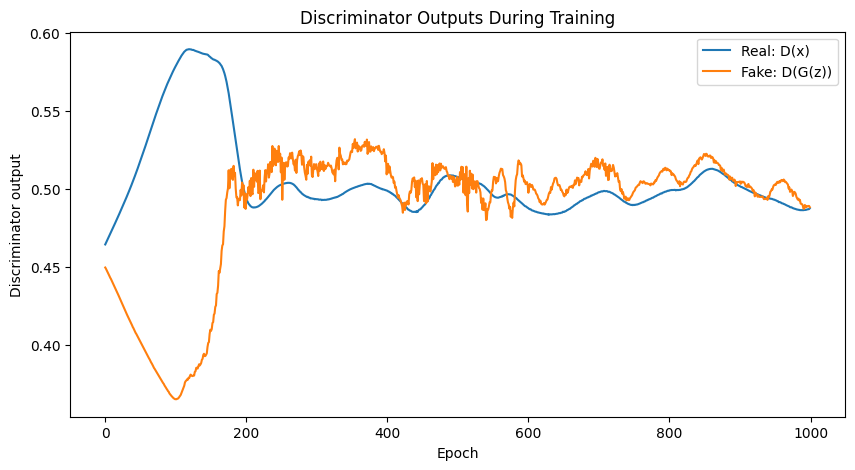

In [145]:
# 绘制鉴别器输出
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(d_real_outputs, label='Real: D(x)')
plt.plot(d_fake_outputs, label='Fake: D(G(z))')
plt.xlabel('Epoch')
plt.ylabel('Discriminator output')
plt.title('Discriminator Outputs During Training')
plt.legend()
plt.show()

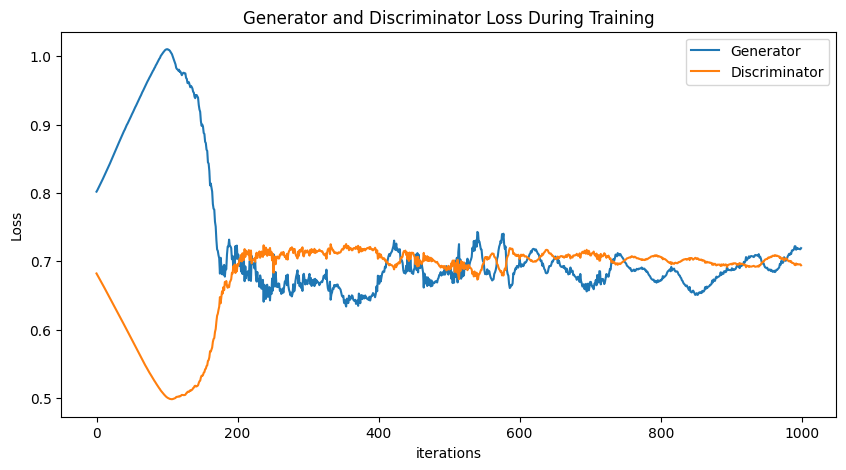

In [146]:
import matplotlib.pyplot as plt

# 绘制损失曲线
plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(losses_G,label="Generator")
plt.plot(losses_D,label="Discriminator")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()
import matplotlib.pyplot as plt


In [148]:
import pandas as pd
import numpy as np
from google.colab import files

# 假设在训练循环外部初始化一个空列表来收集数据
all_fake_data = []

# 在你的训练循环中，对于每个批次生成的fake_data，执行以下操作：
# 示例：fake_data = generator(noise).detach() # 假设这是你生成数据的方式
fake_data_2d = fake_data.squeeze(1).detach()  # 从[N, 1, sequence_length]转换为[N, sequence_length]
all_fake_data.append(fake_data_2d)

# 训练循环结束后
# 首先，使用torch.cat将所有批次的数据串联起来
concatenated_data_2d = torch.cat(all_fake_data, dim=0)  # 结果形状为[total_samples, sequence_length]

# 然后，将二维数组扁平化为一维数组
flat_data = concatenated_data_2d.view(-1).cpu().numpy()  # 将所有数据扁平化为一维数组

# 最后，将这个一维数组保存为CSV文件
csv_file_path = 'generated_log_returns.csv'
pd.DataFrame(flat_data).to_csv(csv_file_path, index=False)

# 如果你在Colab上工作，使用以下代码下载CSV文件
from google.colab import files
files.download(csv_file_path)






<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**vlioloity clustering_REAL_Data**

In [6]:
%matplotlib inline

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 假设 stats 和 vs 已经正确导入
# from stats import calculate_acf  # 假设这是您计算ACF的函数
# from visualize import visualize_acf  # 假设这是您可视化ACF的函数

# 示例：重新定义的计算ACF函数
def calculate_acf(x, max_lag=1000, for_abs=True):
    if for_abs:
        x = np.abs(x)
    res = np.zeros(max_lag)
    for lag in range(1, max_lag + 1):
        res[lag - 1] = np.corrcoef(x[:-lag], x[lag:])[0, 1]
    return res

# 示例：重新定义的可视化ACF函数
def visualize_acf(acf_values, file_name, scale='log'):
    plt.figure(dpi=150)
    plt.plot(np.linspace(1, len(acf_values), len(acf_values)), acf_values, '.')
    plt.ylim(1e-5, 1.)
    if scale == 'linear':
        plt.ylim(-1., 1.)
    plt.xscale('log')
    plt.yscale(scale)
    plt.xlabel('lag $k$', fontsize=20)
    plt.ylabel('Auto-correlation', fontsize=20)
    plt.savefig(file_name + '.png', transparent=True)
    plt.close()

# 假设您的对数回报率数据存储在一个名为log_returns的numpy数组中
generated_data_Gregg = pd.read_csv('M:\Machine Learing\greg_data_manager.csv')
# 提取对数回报率列
# 正确访问名为'Log Return'的列
log_return = generated_data_Gregg['Log Return']

# 计算ACF
acf_values = calculate_acf(log_return, max_lag=1000, for_abs=True)

# 可视化ACF
file_name = "Volatility Clustering_real_GREGG"  # 您想要保存图像的文件名
title = "Volatility Clustering"  # 添加的标题
visualize_acf(acf_values, file_name, scale='log')


**vlioloity clustering_fAKE_Data_gregg**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 假设 stats 和 vs 已经正确导入
# from stats import calculate_acf  # 假设这是您计算ACF的函数
# from visualize import visualize_acf  # 假设这是您可视化ACF的函数

# 示例：重新定义的计算ACF函数
def calculate_acf(x, max_lag=1000, for_abs=True):
    if for_abs:
        x = np.abs(x)
    res = np.zeros(max_lag)
    for lag in range(1, max_lag + 1):
        res[lag - 1] = np.corrcoef(x[:-lag], x[lag:])[0, 1]
    return res

# 示例：重新定义的可视化ACF函数
def visualize_acf(acf_values, file_name, scale='log'):
    plt.figure(dpi=150)
    plt.plot(np.linspace(1, len(acf_values), len(acf_values)), acf_values, '.')
    plt.ylim(1e-5, 1.)
    if scale == 'linear':
        plt.ylim(-1., 1.)
    plt.xscale('log')
    plt.yscale(scale)
    plt.xlabel('lag $k$', fontsize=20)
    plt.ylabel('Auto-correlation', fontsize=20)
    plt.savefig(file_name + '.png', transparent=True)
    plt.close()

# 指定文件路径，并读取前7800行数据，没有列标题
file_path = 'M:/Machine Learing/generated_data (18;50).csv'
generated_data_Gregg = pd.read_csv(file_path, header=None, nrows=7800)

# 给数据列命名
generated_data_Gregg.columns = ['Log Return']
log_return = generated_data_Gregg['Log Return']

# 计算ACF
acf_values = calculate_acf(log_return, max_lag=1000, for_abs=True)

# 可视化ACF
file_name = "acf_plot_fake"  # 您想要保存图像的文件名
title = "Volatility Clustering"  # 添加的标题
visualize_acf(acf_values, file_name, scale='log')



**coarse_volatility& lead_lag_correlation_Fake_GREGG_DATA**

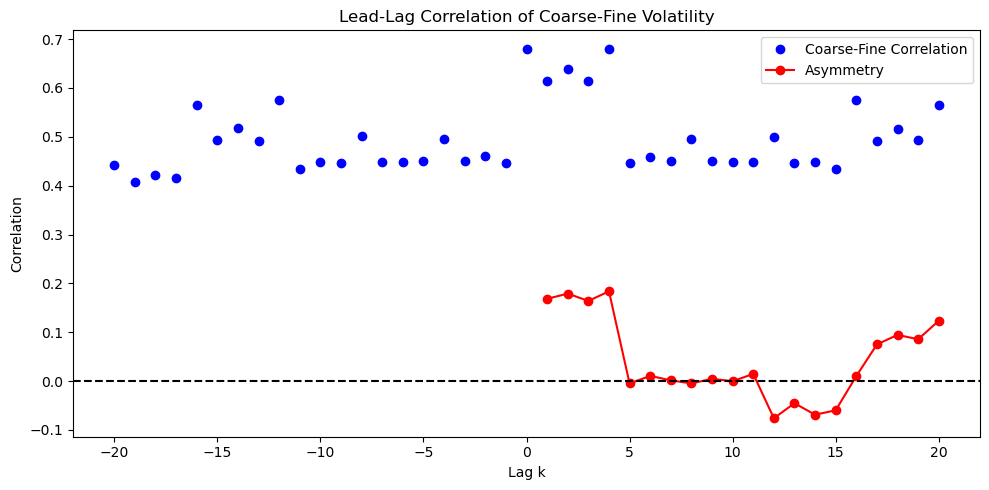

In [30]:
import numpy as np
import pandas as pd

# 假设你已经有了对数收益率的数据，这里我们使用log_return作为示例
file_path = 'M:/Machine Learing/generated_data (18;50).csv'
generated_data_Gregg = pd.read_csv(file_path, header=None, nrows=8190)

# 给数据列命名
generated_data_Gregg.columns = ['Log Return']
log_return = generated_data_Gregg['Log Return']

# 设置时间窗口τ为5天
tau = 5

# 计算粗波动性（τ天内价格变动的绝对值）
coarse_volatility = np.abs(log_return).rolling(window=tau).sum()

# 计算细波动性（τ天内绝对回报的和）
fine_volatility = log_return.abs().rolling(window=1).sum()

# 计算粗细波动性的领先-滞后相关性
lead_lag_correlation = lambda k: coarse_volatility.corr(fine_volatility.shift(k))

# 示例：计算k=1时的领先-滞后相关性
correlation_at_lag_1 = lead_lag_correlation(1)

# 计算粗细波动性的相关性差异（对应文中公式(7)）
correlation_difference = lead_lag_correlation(1) - lead_lag_correlation(-1)


# 计算不同滞后值的领先-滞后相关性
lags = range(-20, 21)  # 从 -20 到 20 的滞后值
correlations = [lead_lag_correlation(k) for k in lags]

# 计算正负滞后的相关性差异
asymmetries = [lead_lag_correlation(k) - lead_lag_correlation(-k) for k in range(1, 21)]

# 绘制领先-滞后相关性
plt.figure(figsize=(10, 5))
plt.plot(lags, correlations, 'bo', label='Coarse-Fine Correlation')
plt.plot(range(1, 21), asymmetries, 'ro-', label='Asymmetry')
plt.axhline(y=0, color='k', linestyle='--')  # 添加0线作为基准
plt.xlabel('Lag k')
plt.ylabel('Correlation')
plt.title('Lead-Lag Correlation of Coarse-Fine Volatility')
plt.legend()
plt.show()


**coarse_volatility& lead_lag_correlation_Real_GREGG_DATA**

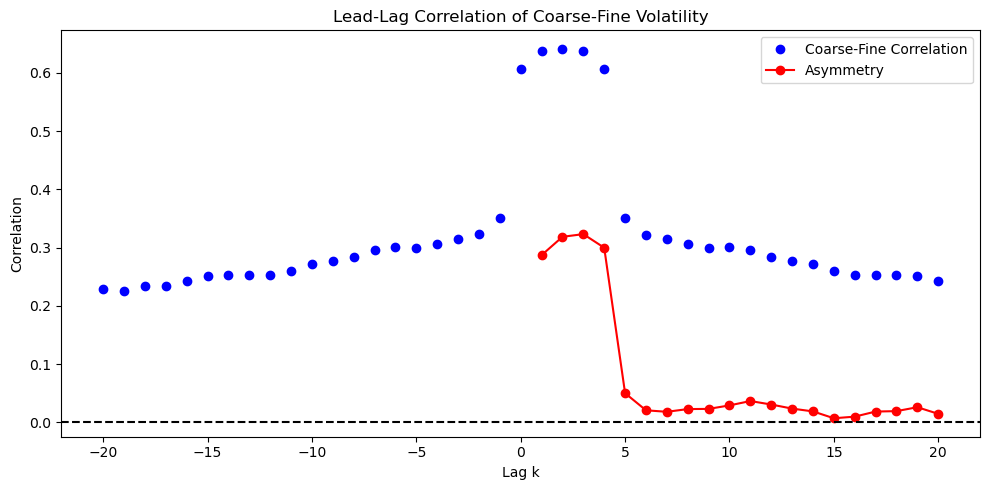

In [32]:
#真实数据
import numpy as np
import pandas as pd

# 假设你已经有了对数收益率的数据，这里我们使用log_return作为示例
file_path = 'M:\Machine Learing\greg_data_manager.csv'
generated_data_Gregg = pd.read_csv(file_path)

# 给数据列命名

log_return = generated_data_Gregg['Log Return']

# 设置时间窗口τ为5天
tau = 5

# 计算粗波动性（τ天内价格变动的绝对值）
coarse_volatility = np.abs(log_return).rolling(window=tau).sum()

# 计算细波动性（τ天内绝对回报的和）
fine_volatility = log_return.abs().rolling(window=1).sum()

# 计算粗细波动性的领先-滞后相关性
lead_lag_correlation = lambda k: coarse_volatility.corr(fine_volatility.shift(k))

# 示例：计算k=1时的领先-滞后相关性
correlation_at_lag_1 = lead_lag_correlation(1)

# 计算粗细波动性的相关性差异（对应文中公式(7)）
correlation_difference = lead_lag_correlation(1) - lead_lag_correlation(-1)


# 计算不同滞后值的领先-滞后相关性
lags = range(-20, 21)  # 从 -20 到 20 的滞后值
correlations = [lead_lag_correlation(k) for k in lags]

# 计算正负滞后的相关性差异
asymmetries = [lead_lag_correlation(k) - lead_lag_correlation(-k) for k in range(1, 21)]

# 绘制领先-滞后相关性
plt.figure(figsize=(10, 5))
plt.plot(lags, correlations, 'bo', label='Coarse-Fine Correlation')
plt.plot(range(1, 21), asymmetries, 'ro-', label='Asymmetry')
plt.axhline(y=0, color='k', linestyle='--')  # 添加0线作为基准
plt.xlabel('Lag k')
plt.ylabel('Correlation')
plt.title('Lead-Lag Correlation of Coarse-Fine Volatility')
plt.legend()
plt.show()

**the 'Gain/Loss Asymmetry - real data**

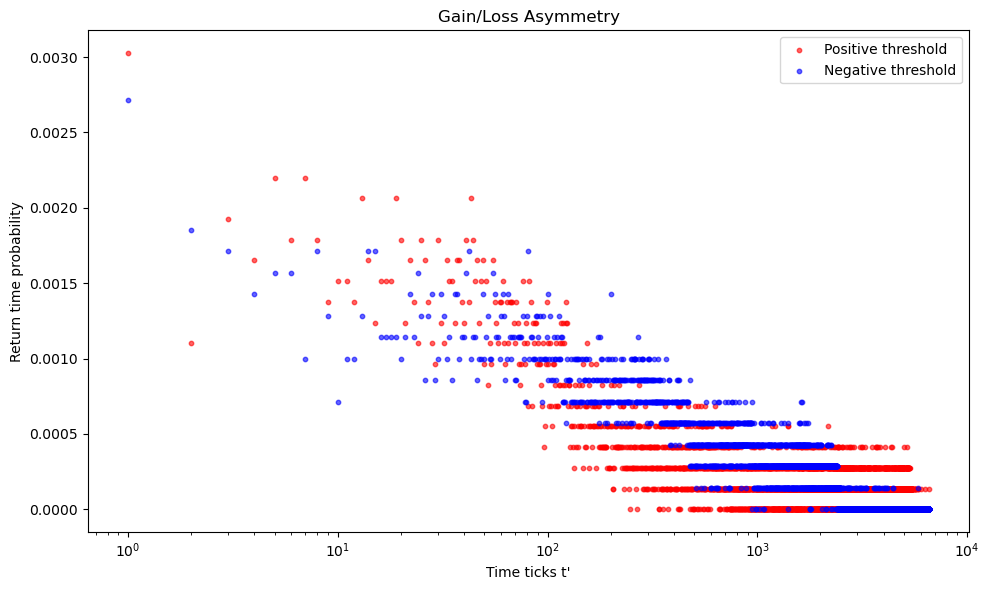

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# 假设log_returns是您的对数收益率数据
# 假设你已经有了对数收益率的数据，这里我们使用log_return作为示例
file_path = 'M:\Machine Learing\greg_data_manager.csv'
generated_data_Gregg = pd.read_csv(file_path)

# 给数据列命名

log_return = generated_data_Gregg['Log Return']

# 定义阈值
theta_pos = 0.1
theta_neg = -0.1



# 初始化等待时间的列表
wait_times_positive = []
wait_times_negative = []

# 计算等待时间
for t in range(len(log_return) - 1):
    # 计算正阈值的等待时间
    for future_t in range(t + 1, len(log_return)):
        if log_return[future_t] - log_return[t] >= theta_pos:
            wait_times_positive.append(future_t - t)
            break
    # 计算负阈值的等待时间
    for future_t in range(t + 1, len(log_return)):
        if log_return[future_t] - log_return[t] <= theta_neg:
            wait_times_negative.append(future_t - t)
            break

# 计算概率分布
max_wait = max(max(wait_times_positive), max(wait_times_negative))
wait_times_distribution_pos = [wait_times_positive.count(i) / len(wait_times_positive) for i in range(1, max_wait + 1)]
wait_times_distribution_neg = [wait_times_negative.count(i) / len(wait_times_negative) for i in range(1, max_wait + 1)]

plt.figure(figsize=(10, 6))  # 调整图表大小以匹配第一张图的大小

# 如果您希望散点图的点更小，可以减小 s 的值
plt.scatter(range(1, max_wait + 1), wait_times_distribution_pos, color='red', s=10, label='Positive threshold', alpha=0.6)
plt.scatter(range(1, max_wait + 1), wait_times_distribution_neg, color='blue', s=10, label='Negative threshold', alpha=0.6)

plt.xscale('log')
# 将 y 轴设置为线性尺度
plt.yscale('linear')

plt.xlabel('Time ticks t\'')
plt.ylabel('Return time probability')
plt.title('Gain/Loss Asymmetry')
plt.legend()

# 设置y轴的范围以匹配第一张图的范围
# 根据第一张图的纵轴范围调整下面的值


# 显示图表
plt.show()


**Gain/Loss Asymmetry on Gregg Fake data**

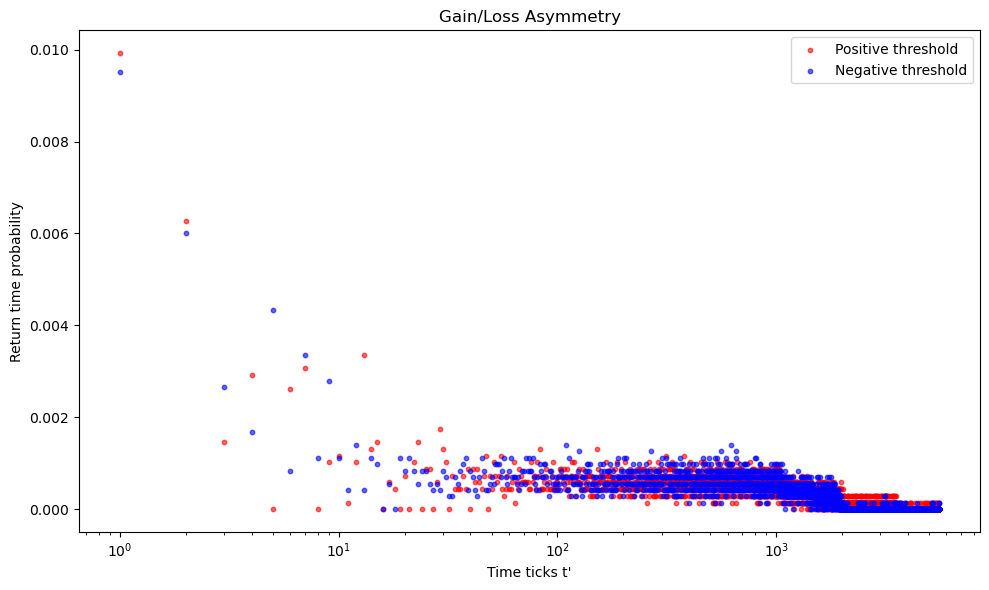

In [53]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# 指定文件路径
file_path = 'M:/Machine Learing/generated_data (18;50).csv'  # 请替换为您文件的实际路径
# 读取CSV文件，确保数据被读取为浮点数
generated_data_Gregg = pd.read_csv(file_path, header=None, nrows=8190)

# 给数据列命名
generated_data_Gregg.columns = ['Log Return']
log_return = generated_data_Gregg['Log Return']

# 定义阈值
theta_pos = 0.1
theta_neg = -0.1



# 初始化等待时间的列表
wait_times_positive = []
wait_times_negative = []

# 计算等待时间
for t in range(len(log_return) - 1):
    # 计算正阈值的等待时间
    for future_t in range(t + 1, len(log_return)):
        if log_return[future_t] - log_return[t] >= theta_pos:
            wait_times_positive.append(future_t - t)
            break
    # 计算负阈值的等待时间
    for future_t in range(t + 1, len(log_return)):
        if log_return[future_t] - log_return[t] <= theta_neg:
            wait_times_negative.append(future_t - t)
            break

# 计算概率分布
max_wait = max(max(wait_times_positive), max(wait_times_negative))
wait_times_distribution_pos = [wait_times_positive.count(i) / len(wait_times_positive) for i in range(1, max_wait + 1)]
wait_times_distribution_neg = [wait_times_negative.count(i) / len(wait_times_negative) for i in range(1, max_wait + 1)]

plt.figure(figsize=(10, 6))  # 调整图表大小以匹配第一张图的大小

# 如果您希望散点图的点更小，可以减小 s 的值
plt.scatter(range(1, max_wait + 1), wait_times_distribution_pos, color='red', s=10, label='Positive threshold', alpha=0.6)
plt.scatter(range(1, max_wait + 1), wait_times_distribution_neg, color='blue', s=10, label='Negative threshold', alpha=0.6)

plt.xscale('log')
# 将 y 轴设置为线性尺度
plt.yscale('linear')

plt.xlabel('Time ticks t\'')
plt.ylabel('Return time probability')
plt.title('Gain/Loss Asymmetry')
plt.legend()

# 设置y轴的范围以匹配第一张图的范围
# 根据第一张图的纵轴范围调整下面的值


# 显示图表
plt.show()


**leveraged_effect_generated_data_Gregg_colab'**

In [ ]:
import pandas as pd
import numpy as np
import stylized_facts as sf

# 假设您已经加载了数据到 DataFrame
generated_data_Gregg = pd.read_csv('M:\Machine Learing\generated_data (18;50).csv')

# 提取对数回报率列
log_return = generated_data_Gregg.values

# 由于我们是基于单个时间序列的分析，您需要将数据重塑为(1, N)的形状
log_return_reshaped = log_return.reshape(1, -1)

# 调用杠杆效应函数并生成图形，这里的file_name是图形保存的路径和名称，不需要加.png
file_name = 'leveraged_effect_generated_data_Gregg_colab'
sf.leverage_effect(log_return_reshaped, file_name=file_name, multiple=True)

# 运行此代码后，您应该在指定的路径下找到名为leveraged_effect_generated_data_Gregg_colab'的图像文件

**leveraged_effect_Gregg_Real_data**

In [55]:
import pandas as pd
import numpy as np
import stylized_facts as sf

# 假设您已经加载了数据到drax_data DataFrame
GREGG_real_data = pd.read_csv('M:\Machine Learing\greg_data_manager.csv')

# 提取对数回报率列
log_return = GREGG_real_data['Log Return'].values

# 由于我们是基于单个时间序列的分析，您需要将数据重塑为(1, N)的形状
log_return_reshaped = log_return.reshape(1, -1)

# 调用杠杆效应函数并生成图形，这里的file_name是图形保存的路径和名称，不需要加.png
file_name = 'leveraged_effect_GREGG_real_data'
sf.leverage_effect(log_return_reshaped, file_name=file_name, multiple=True)

# 运行此代码后，您应该在指定的路径下找到名为'leveraged_effect.png'的图像文件


array([ -5.39297741,  -8.06454159,  -6.19711778,   1.38312101,
        -7.86243121,  -7.12450173, -11.35811587, -15.77989194,
        -4.39162865,  -7.13603124,  -5.50369142,  -6.53437508,
        -7.48747257,  -0.41041599,  -2.63948148,  -7.68125797,
        -5.80141028,  -8.85720326,  -6.50909383,  -6.32507785,
        -0.07761375,   2.4373624 ,   3.25981617,   6.19433413,
        -0.05969226,   1.50841039,   6.50836829,   7.2746704 ,
       -13.3423235 ,   0.67843189,  -1.10161609,  -0.43908431,
        -3.30015525,  -3.51202065, -10.18964014,  -3.79397093,
         0.71981381,  -5.79864988,   4.04242089,  -9.0399533 ,
        -5.62507932,   5.51760593,  -6.99214714, -10.05873573,
        -2.96898727,  -0.68349318,  -5.91588794,  -4.30578694,
        -3.73186009,   1.2448134 ,   3.64790734,   2.29273106,
         2.42693669,  -0.85897158,   0.79197547,  -1.84546409,
         2.15991124,  -2.45430111,  -1.07879368,   3.00134572,
        -2.31427322,  -0.75903719,   3.10862072,  -5.09

**time_series_chart_Gen_colab'Fake data_GREGG**

In [4]:
# times seriers



import pandas as pd
from stats import acf as calculate_acf
from visualize import acf as plot_acf
import pandas as pd
from visualize import time_series
import matplotlib.pyplot as plt

# 载入数据，这里假设您的时间序列数据在CSV文件的'Log Return'列
# 假设你已经有了对数收益率的数据，这里我们使用log_return作为示例
file_path = 'M:/Machine Learing/generated_data (18;50).csv'
generated_data_Gregg = pd.read_csv(file_path, header=None, nrows=8190)

# 给数据列命名
generated_data_Gregg.columns = ['Log Return']
x  = generated_data_Gregg['Log Return']

# 调用函数，绘制时间序列并保存图表
time_series(x, 'time_series_chart_Fake_GREGG')
plt.show()
# 图表将被保存在当前工作目录，文件名为'time_series_chart.png'

**time_series_chart_Gen_colab'Real data_GREGG**

In [ ]:



# times seriers

import pandas as pd
from stats import acf as calculate_acf
from visualize import acf as plot_acf
import pandas as pd
from visualize import time_series
import matplotlib.pyplot as plt

# 载入数据，这里假设您的时间序列数据在CSV文件的'Log Return'列
time_series_data = pd.read_csv('greg_data_manager.csv')
x = time_series_data['Log Return']

# 调用函数，绘制时间序列并保存图表
time_series(x, 'time_series_chart_GREGG_1990-2024')
plt.show()

**FAT_TAIL distrubtuin on GREGG_Fake**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stylized_facts as sf
import visualize as vs

def plot_distribution(file_path, file_name):
    # 加载数据
    generated_data_Gregg = pd.read_csv(file_path)

    # 提取对数回报率列
    log_return = generated_data_Gregg.values

    # 使用 stylized_facts.py 中的函数正态化数据
    normalized_log_return = sf.normalize_time_series(log_return)

    # 使用 stylized_facts.py 中的函数计算分布并绘图，不需要解包返回值
    sf.distribution(normalized_log_return, file_name, scale='log', multiple=False, normalize=True)

# 文件路径 - 请替换为您CSV文件的实际路径
file_path = 'M:\Machine Learing\generated_data (18;50).csv'

# 图形文件的名称 - 请根据需要进行替换
file_name = 'heavy_tailed_distribution_Fake_GREGG_colab'

# 调用函数进行计算和绘图
plot_distribution(file_path, file_name)

**FAT_TAIL distrubtuin on GREGG_Real**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stylized_facts as sf
import visualize as vs

def plot_distribution(file_path, file_name):
    # 加载数据
    Gregg_data = pd.read_csv(file_path)

    # 提取对数回报率列
    log_return = Gregg_data['Log Return'].values

    # 使用 stylized_facts.py 中的函数正态化数据
    normalized_log_return = sf.normalize_time_series(log_return)

    # 使用 stylized_facts.py 中的函数计算分布并绘图，不需要解包返回值
    sf.distribution(normalized_log_return, file_name, scale='log', multiple=False, normalize=True)

# 文件路径 - 请替换为您CSV文件的实际路径
file_path = 'M:\Machine Learing\greg_data_manager.csv'

# 图形文件的名称 - 请根据需要进行替换
file_name = 'heavy_tailed_distribution_GREGG_Real'

# 调用函数进行计算和绘图
plot_distribution(file_path, file_name)

**Linear Problilities _Real data_GREGG**

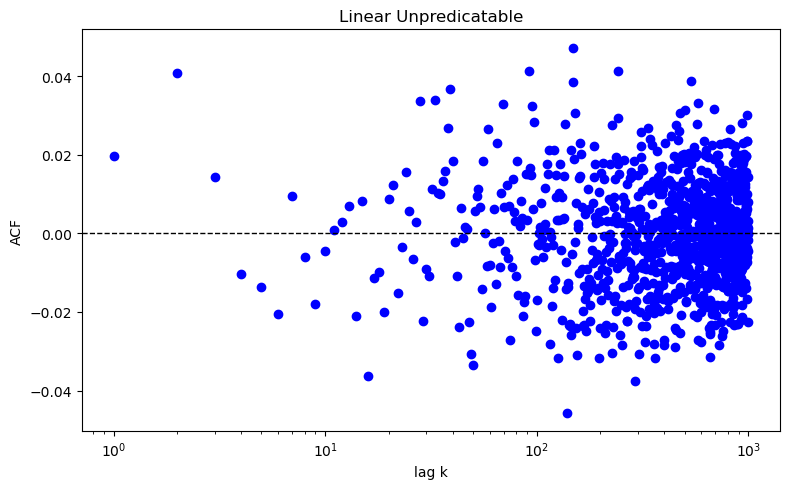

In [58]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt


# 载入您的数据
time_series_data = pd.read_csv('M:\Machine Learing\greg_data_manager.csv') # 替换成您实际的文件路径
log_returns = time_series_data['Log Return'] # 替换成您对数收益率数据的列名

# 计算自相关系数
acf_values = acf(log_returns, nlags=1000, fft=True)  # 计算50个滞后的自相关系数

# 绘制自相关系数图
plt.figure(figsize=(8, 5))
lags = np.arange(1, len(acf_values))  # 从滞后1开始到ACF值的数量
plt.plot(lags, acf_values[1:], 'o', linestyle='None', color='blue')  # 从第一个滞后开始绘制
plt.xscale('log')  # 将x轴设置为对数刻度
plt.xlabel('lag k')
plt.ylabel('ACF')
plt.title('Linear Unpredicatable')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # 在y=0处画一条水平虚线
plt.show()

**Linear Problilities _Fake data_GREGG**

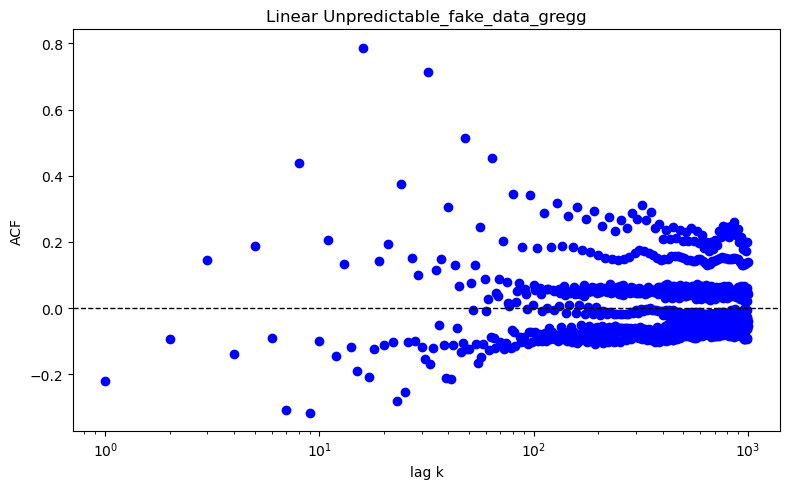

In [56]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

# 载入您的数据
file_path = 'M:/Machine Learing/generated_data (18;50).csv'  # 请替换为您文件的实际路径
generated_data_Gregg = pd.read_csv(file_path, header=None, nrows=8190)

# 给数据列命名
generated_data_Gregg.columns = ['Log Return']
log_return = generated_data_Gregg['Log Return']

# 计算自相关系数
acf_values = acf(log_return, nlags=1000, fft=True)  # 计算1000个滞后的自相关系数

# 绘制自相关系数图
plt.figure(figsize=(8, 5))
lags = np.arange(1, len(acf_values))  # 从滞后1开始到ACF值的数量
plt.plot(lags, acf_values[1:], 'o', linestyle='None', color='blue')  # 从第一个滞后开始绘制
plt.xscale('log')  # 将x轴设置为对数刻度
plt.xlabel('lag k')
plt.ylabel('ACF')
plt.title('Linear Unpredictable_fake_data_gregg')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # 在y=0处画一条水平虚线

# 在显示之前保存图形
plt.savefig('Linear Unpredictable_fake_data_gregg.png', bbox_inches='tight')

# 显示图表
plt.show()


合并图表

In [5]:
from PIL import Image

# 加载所有图像并放入一个列表中
image_paths = [
    r'M:\Machine Learing\time_series_chart_GREGG_1990-2024.png',
    r'M:\Machine Learing\Groupwork(PIC)-gendata18;50\linear_unpredictability_real_GREGG.png',
    r'M:\Machine Learing\Groupwork(PIC)-gendata18;50\heavy_tailed_distribution_GREGG_Real_neg_log.png',
    r'M:\Machine Learing\Groupwork(PIC)-gendata18;50\acf_plot_real.png',
    r'M:\Machine Learing\Groupwork(PIC)-gendata18;50\leveraged_effect_GREGG_real_data.png',
    r'M:\Machine Learing\coarse-fine-vilolity_real_data_GREGG.png',
    r'M:\Machine Learing\Groupwork(PIC)-gendata18;50\Gain and loss_Asymmtary-real_data_GREGG.png'
]
images = [Image.open(path).convert("RGBA") for path in image_paths]  # 转换为RGBA模式

# 确定统一的尺寸，这里我们使用最小的宽度和高度
min_width = min(img.width for img in images)
min_height = min(img.height for img in images)

# 调整图像大小
resized_images = [img.resize((min_width, min_height), Image.ANTIALIAS) for img in images]

# 创建一个白色背景的画布，宽度是最小宽度的四倍，高度是最小高度的两倍
combined_img = Image.new('RGBA', (min_width * 4, min_height * 2), (255, 255, 255, 255))  # 白色背景

# 第一行四个图像
for i, img in enumerate(resized_images[:4]):
    combined_img.paste(img, (min_width * i, 0), img)  # 传递原始图像的Alpha通道信息

# 第二行三个图像，居中对齐
offset = min_width  # 第二行的开始位置为一个图像宽度，以便居中对齐
for i, img in enumerate(resized_images[4:7]):
    combined_img.paste(img, (offset + min_width * i, min_height), img)  # 传递原始图像的Alpha通道信息

# 保存或显示合成的图像
combined_img.save('combined_figure.png', 'PNG')



C:\Users\2849636W\AppData\Local\Temp\ipykernel_13676\4291987650.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_images = [img.resize((min_width, min_height), Image.ANTIALIAS) for img in images]


**fake data combined**

In [12]:
from PIL import Image

# 加载所有图像并放入一个列表中
image_paths = [
    r'M:\Machine Learing\fake data\time_series_chart_Gen_colab.png',
    r'M:\Machine Learing\fake data\linear_unpredictability_acf.png',
    r'M:\Machine Learing\fake data\heavy_tailed_distribution_Fake_GREGG_colab_neg_log.png',
    r'M:\Machine Learing\fake data\acf_plot_fake.png',
    r'M:\Machine Learing\fake data\leveraged_effect_generated_data_Gregg_colab.png',
    r'M:\Machine Learing\fake data\'Lead-Lag Correlation of Coarse-Fine Volatility.png',
    r'M:\Machine Learing\fake data\Gain and loss_Asymmtary-real_data_GREGG.png'
]
images = [Image.open(path).convert("RGBA") for path in image_paths]  # 转换为RGBA模式

# 确定统一的尺寸，这里我们使用最小的宽度和高度
min_width = min(img.width for img in images)
min_height = min(img.height for img in images)

# 调整图像大小
resized_images = [img.resize((min_width, min_height), Image.ANTIALIAS) for img in images]

# 创建一个白色背景的画布，宽度是最小宽度的四倍，高度是最小高度的两倍
combined_img = Image.new('RGBA', (min_width * 4, min_height * 2), (255, 255, 255, 255))  # 白色背景

# 第一行四个图像
for i, img in enumerate(resized_images[:4]):
    combined_img.paste(img, (min_width * i, 0), img)  # 传递原始图像的Alpha通道信息

# 第二行三个图像，居中对齐
offset = min_width  # 第二行的开始位置为一个图像宽度，以便居中对齐
for i, img in enumerate(resized_images[4:7]):
    combined_img.paste(img, (offset + min_width * i, min_height), img)  # 传递原始图像的Alpha通道信息

# 保存或显示合成的图像
combined_img.save('combined_fake_figure.png', 'PNG')

C:\Users\2849636W\AppData\Local\Temp\ipykernel_13676\1605862991.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_images = [img.resize((min_width, min_height), Image.ANTIALIAS) for img in images]
